In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically between TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/pace_landmarks'

base_dir = '/content/drive/My Drive/pace_landmarks'
train_dir = '/content/drive/My Drive/pace_landmarks/train'
validation_dir = '/content/drive/My Drive/pace_landmarks/val'


train_cafeteria_dir = '/content/drive/My Drive/pace_landmarks/train/cafeteria'
train_classroom_dir = '/content/drive/My Drive/pace_landmarks/train/classroom'
train_library_dir = '/content/drive/My Drive/pace_landmarks/train/library'

validation_cafeteria_dir = '/content/drive/My Drive/pace_landmarks/val/cafeteria'
validation_classroom_dir = '/content/drive/My Drive/pace_landmarks/val/classroom'
validation_library_dir = '/content/drive/My Drive/pace_landmarks/val/library'

test  train  val


In [0]:
# Images will be resized to(TARGET_SHAPE, TARGET_SHAPE) as they're read off disk.
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [0]:
num_cafeteria_tr = len(os.listdir(train_cafeteria_dir))
num_classroom_tr = len(os.listdir(train_classroom_dir))
num_library_tr = len(os.listdir(train_library_dir))

num_cafeteria_val = len(os.listdir(validation_cafeteria_dir))
num_classroom_val = len(os.listdir(validation_classroom_dir))
num_library_val = len(os.listdir(validation_library_dir))

total_train = num_cafeteria_tr + num_classroom_tr + num_library_tr
total_val = num_cafeteria_val + num_classroom_val + num_library_val

print('Training cafeteria images:', num_cafeteria_tr)
print('Training classroom images:', num_classroom_tr)
print('Training library images:', num_library_tr)
print('\n')

print('Validation cafeteria images:', num_cafeteria_val)
print('Validation classroom images:', num_classroom_val)
print('Validation library images:', num_library_val)
print('\n')

print("--")

print("Total training images:", total_train)
print("Total validation images:", total_val)

Training cafeteria images: 20
Training classroom images: 20
Training library images: 20


Validation cafeteria images: 5
Validation classroom images: 5
Validation library images: 5


--
Total training images: 60
Total validation images: 15


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, # Best practice: shuffle the training data
                                                     target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                     class_mode='categorical')

Found 60 images belonging to 3 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=validation_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='categorical')

Found 15 images belonging to 3 classes.


In [0]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [0]:
# This function will plot images in a grid with 1 row and 5 columns
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

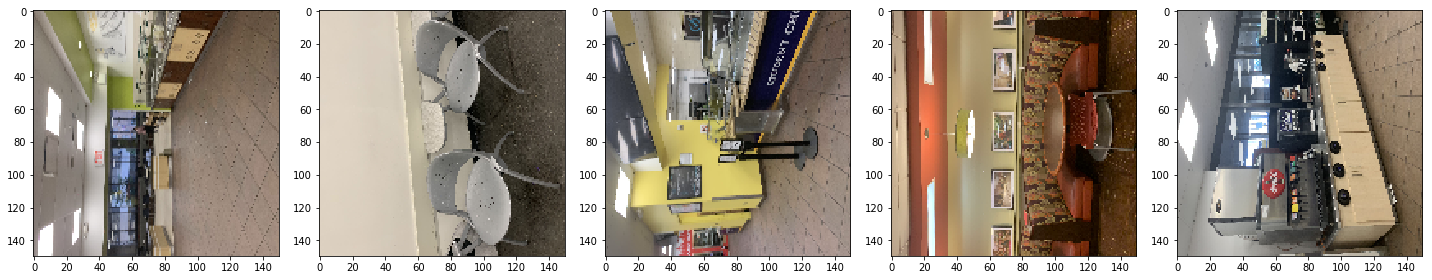

In [0]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3), kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

model.summary()
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)      

In [0]:
`model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)      

In [0]:
EPOCHS = 25

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/25


W0630 01:20:30.535803 139622459639680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2/2 [==============================] - 26s 13s/step - loss: 7.8273 - accuracy: 0.2833 - val_loss: 6.0044 - val_accuracy: 0.3333
Epoch 2/25
2/2 [==============================] - 10s 5s/step - loss: 5.8946 - accuracy: 0.3667 - val_loss: 5.5350 - val_accuracy: 0.3333
Epoch 3/25
2/2 [==============================] - 15s 7s/step - loss: 5.4377 - accuracy: 0.3333 - val_loss: 5.1202 - val_accuracy: 0.3333
Epoch 4/25
2/2 [==============================] - 15s 7s/step - loss: 5.0175 - accuracy: 0.4000 - val_loss: 4.7451 - val_accuracy: 0.4667
Epoch 5/25
2/2 [==============================] - 14s 7s/step - loss: 4.6474 - accuracy: 0.4167 - val_loss: 4.4115 - val_accuracy: 0.3333
Epoch 6/25
2/2 [==============================] - 15s 7s/step - loss: 4.2986 - accuracy: 0.5333 - val_loss: 4.1058 - val_accuracy: 0.3333
Epoch 7/25
2/2 [==============================] - 15s 7s/step - loss: 4.0010 - accuracy: 0.3667 - val_loss: 3.8189 - val_accuracy: 0.5333
Epoch 8/25
2/2 [============================

In [0]:
EPOCHS = 25

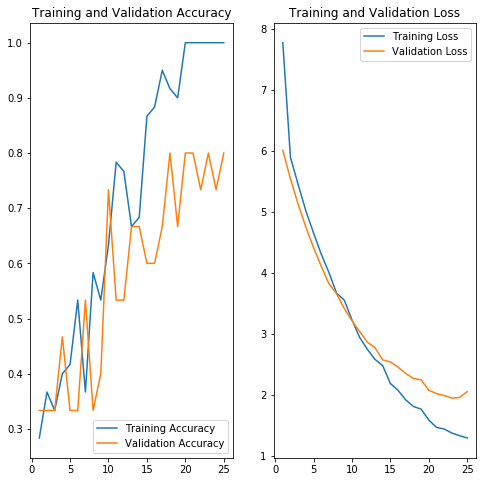

In [0]:
#acc = history.history['acc']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()